In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

In [2]:
mu = 0.0                     # Order mu of Bessel function
r = np.logspace(-7, 1, 128)  # Input evaluation points
dln = np.log(r[1]/r[0])      # Step size
offset = fft.fhtoffset(dln, initial=-6*np.log(10), mu=mu)
k = np.exp(offset)/r[::-1]   # Output evaluation points

In [8]:
dln

0.14504473026734127

In [3]:
def f(x, mu):
    """Analytical function: x^(mu+1) exp(-x^2/2)."""
    return x**(mu + 1)*np.exp(-x**2/2)

In [4]:
a_r = f(r, mu)
fht = fft.fht(a_r, dln, mu=mu, offset=offset)

In [5]:
a_k = f(k, mu)
rel_err = abs((fht-a_k)/a_k)

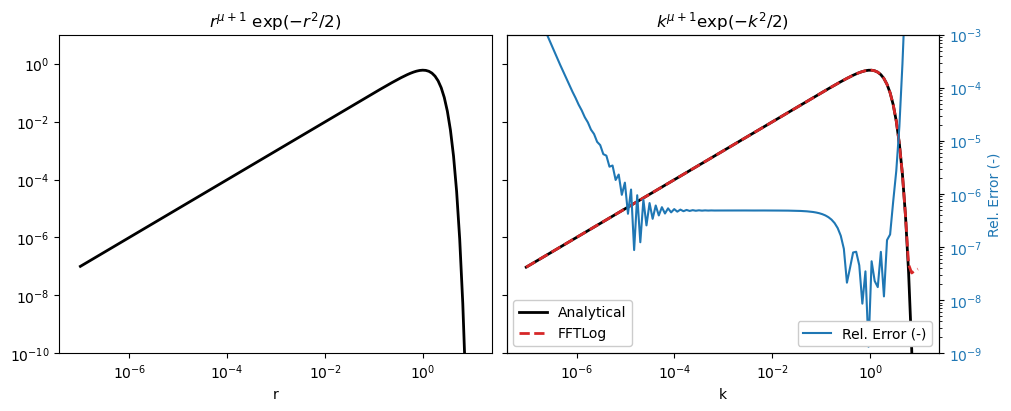

In [6]:
figargs = {'sharex': True, 'sharey': True, 'constrained_layout': True}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), **figargs)
ax1.set_title(r'$r^{\mu+1}\ \exp(-r^2/2)$')
ax1.loglog(r, a_r, 'k', lw=2)
ax1.set_xlabel('r')
ax2.set_title(r'$k^{\mu+1} \exp(-k^2/2)$')
ax2.loglog(k, a_k, 'k', lw=2, label='Analytical')
ax2.loglog(k, fht, 'C3--', lw=2, label='FFTLog')
ax2.set_xlabel('k')
ax2.legend(loc=3, framealpha=1)
ax2.set_ylim([1e-10, 1e1])
ax2b = ax2.twinx()
ax2b.loglog(k, rel_err, 'C0', label='Rel. Error (-)')
ax2b.set_ylabel('Rel. Error (-)', color='C0')
ax2b.tick_params(axis='y', labelcolor='C0')
ax2b.legend(loc=4, framealpha=1)
ax2b.set_ylim([1e-9, 1e-3])
plt.show()